### Downloading and Unzipping the dataset

In [3]:
!rm -rf gzip*
!wget http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
!unzip gzip.zip

URL transformed to HTTPS due to an HSTS policy
--2018-05-09 20:21:52--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  45.6MB/s    in 15s     

2018-05-09 20:22:08 (35.7 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating:

### Loading the Test and Train Data

In [0]:
import numpy as np
import os
import gzip
import random
from collections import Counter
def load_mnist_images(path, filename):
    shape=(-1, 28*28)
    filepath=path+filename
    with gzip.open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(shape)
    return np.float32(data)

def load_mnist_labels(path, filename):
    shape=(-1, 28*28)

    filepath=path+filename
    with gzip.open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data


def load_mnist_dataset(path="./gzip/"):
    shape=(-1, 784)
    # Download and read the training and test set images and labels.
    X_train = load_mnist_images(path, 'emnist-byclass-train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels(path, 'emnist-byclass-train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images(path, 'emnist-byclass-test-images-idx3-ubyte.gz')
    y_test = load_mnist_labels(path, 'emnist-byclass-test-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:], X_train[-10000:]
    y_train, y_val = y_train[:], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32)
    X_val = np.asarray(X_val, dtype=np.float32)
    y_val = np.asarray(y_val, dtype=np.int32)
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32)
    y_test-=1
    y_train-=1
    return X_train, y_train, X_test, y_test

  
# Reading the Input  
X_train, y_train, X_test, y_test = load_mnist_dataset('./gzip/')


### Extracting 9 Upper Case Alphabets from the dataset and Normalizing the data

In [5]:
# Choosing Alphabets of English Language
charsToUse=['A','Y','U','S','H','G','P','T','R']
indexValues= [(ord(x)-56) for x in charsToUse]
# It should have been 55 but chose 56 to subtract due to labels starting from -1
print(indexValues)
# O and S have the largest number of training labels


print('X_train.shape',X_train.shape)
print("X_test.shape",X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)


# Concating labels to jumble them and filter them out
y_train=y_train[:,np.newaxis]
y_test=y_test[:,np.newaxis]
trainConcat=np.hstack((X_train,y_train))
testConcat=np.hstack((X_test,y_test))

#Filtering the chosen alphabets
print("trainConcat.shape",trainConcat.shape)
print("testConcat.shape",testConcat.shape)
def myfunc(row):
    return (row[784] in indexValues)

bool_arr = np.array([myfunc(row) for row in trainConcat])
trainConcatFiltered = trainConcat[bool_arr]
bool_arr = np.array([myfunc(row) for row in testConcat])
testConcatFiltered = testConcat[bool_arr]
print("trainConcatFiltered.shape",trainConcatFiltered.shape)
print("testConcatFiltered.shape",testConcatFiltered.shape)


# Separating the array and results
train_data_rf=trainConcatFiltered[:,0:784]
train_labels_rf=trainConcatFiltered[:,784]
test_data_rf=testConcatFiltered[:,0:784]
test_labels_rf=testConcatFiltered[:,784]
print("train_data_rf.shape",train_data_rf.shape)
print("train_labels_rf.shape",train_labels_rf.shape)
print("test_data_rf.shape",test_data_rf.shape)
print("test_labels_rf.shape",test_labels_rf.shape)

# Normalizing the data
mean_image = np.mean(train_data_rf, axis = 0)
train_data_rf -= mean_image
test_data_rf -= mean_image

from sklearn.metrics import accuracy_score
trainLabels_nn_list=Counter(train_labels_rf)
print("trainLabels_nn_list:",trainLabels_nn_list)
counterKey=0
labelHashDict={}
hashLabelDict={}
for key, value in trainLabels_nn_list.items():
  labelHashDict[key]=counterKey
  hashLabelDict[counterKey]=key
  counterKey+=1

[9, 33, 29, 27, 16, 15, 24, 28, 26]
('X_train.shape', (697932, 784))
('X_test.shape', (116323, 784))
('y_train.shape', (697932,))
('y_test.shape', (116323,))
('trainConcat.shape', (697932, 785))
('testConcat.shape', (116323, 785))
('trainConcatFiltered.shape', (73425, 785))
('testConcatFiltered.shape', (12120, 785))
('train_data_rf.shape', (73425, 784))
('train_labels_rf.shape', (73425,))
('test_data_rf.shape', (12120, 784))
('test_labels_rf.shape', (12120,))
('trainLabels_nn_list:', Counter({27.0: 20764, 29.0: 12602, 28.0: 9820, 24.0: 8347, 9.0: 6407, 26.0: 5073, 33.0: 4743, 16.0: 3152, 15.0: 2517}))


### Running a Two Layer Neural Network with Relu in hidden Layer and Softmax Loss in final Layer, Using L2 regularization and SGD;  Nice accuracies are achieved in few epochs itself

('Accuracy', 0.08638613861386138)
('i', 0)
('Accuracy', 0.9498349834983498)
('i', 1)
('Accuracy', 0.9650165016501651)
('i', 2)
('Accuracy', 0.9732673267326732)
('i', 3)
('Accuracy', 0.9740924092409241)
('i', 4)
('Accuracy', 0.9761551155115512)
('i', 5)
('Accuracy', 0.9768151815181518)
('i', 6)
('Accuracy', 0.9783003300330033)
('i', 7)
('Accuracy', 0.9782178217821782)
('i', 8)
('Accuracy', 0.9794554455445544)
('i', 9)


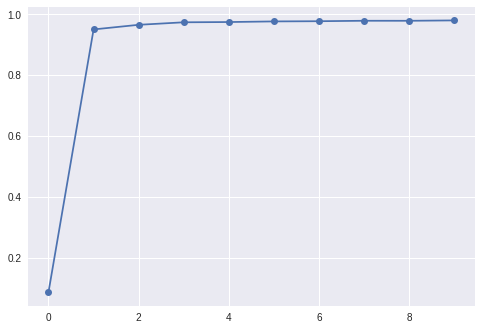

In [11]:
import copy
epoch=10
hidden_layer_nodes=50
output_classes=9
inputSize=784
learn_rate=0.001
learn_rate_decay=1
W1 = np.random.randn(inputSize, hidden_layer_nodes) * 0.0001
b1 = np.zeros(hidden_layer_nodes)
W2 = np.random.randn(hidden_layer_nodes, output_classes) * 0.0001
b2 = np.zeros(output_classes)
transformed_ynn_results=np.vectorize(labelHashDict.get)(test_labels_rf)

reg_param=0.0001

epochNum=[]
accuracy=[]


for i in range(epoch):
  X_nn=train_data_rf
  y_nn=train_labels_rf
  batch_size=64
  y_nn_vector=y_nn[:,np.newaxis]
  trainConcat_nn=np.hstack((X_nn,y_nn_vector))
  trainConcat_nn.shape
  np.random.shuffle(trainConcat_nn)
  
  currentShuffledTrainData=trainConcat_nn[:,0:784]
  currentShuffledLabelData=trainConcat_nn[:,784]
  
  transformed_ynn=np.vectorize(labelHashDict.get)(currentShuffledLabelData)
  h = np.maximum(0, test_data_rf.dot(W1) + b1)
  scores = h.dot(W2) + b2
  y_pred = np.argmax(scores, axis=1)
  
  tempAcc=accuracy_score(transformed_ynn_results, y_pred)
  print("Accuracy",tempAcc)
  epochNum.append(i)
  accuracy.append(tempAcc)
  
  print("i",i)
  for t in range(0,(X_nn.shape[0]/batch_size)):
    if ((t*batch_size)<X_nn.size):
      X=currentShuffledTrainData[(t*batch_size):(t*batch_size)+batch_size]
      y=transformed_ynn[(t*batch_size):(t*batch_size)+batch_size]
      h_output = np.maximum(0, X.dot(W1) + b1)
      normal_output = h_output.dot(W2) + b2
      normal_output_minus_max = normal_output - np.max(normal_output, axis = 1).reshape(-1,1)
      after_softmax = np.exp(normal_output_minus_max)/np.sum(np.exp(normal_output_minus_max), axis = 1).reshape(-1,1)
      changeInOutput = copy.deepcopy(after_softmax)
      changeInOutput[range(batch_size), list(y)] -= 1
      changeInOutput = changeInOutput/batch_size
      delta_W2 = h_output.T.dot(changeInOutput) + reg_param * W2
      delta_b2 = np.sum(changeInOutput, axis = 0)
      dh = changeInOutput.dot(W2.T)
      filtered_delta_h = (h_output > 0) * dh
      delta_W1 = X.T.dot(filtered_delta_h) + reg_param * W1
      delta_b1 = np.sum(filtered_delta_h, axis = 0)
                        
      #loss, grad = loss_two_layer(X,y,0.0,W1,W2,b1,b2)
      W1 = W1 - learn_rate * delta_W1
      W2 = W2 - learn_rate * delta_W2
      b1 = b1 - learn_rate * delta_b1
      b2 = b2 - learn_rate * delta_b2
      
      learn_rate = learn_rate * learn_rate_decay
      
      
      

import matplotlib.pyplot as plt
plt.plot(epochNum, accuracy, '-o')
# plt.axis([0, 6, 0, 20])
plt.show()

### Checking accuracies and fusion table with Random Forest

Confusion matrix, without normalization
[[1035    2    7    0    8    2    0    5    3]
 [   4  403    0    4    0   27    1    8    0]
 [  37    1  466    0    0    1    0   14    2]
 [  10    0    0 1374    1    1    3    5    3]
 [  35    0    1    9  759    1    0    4    0]
 [   2    2    1    2    2 3492    4    3    0]
 [   2    0    0    6    0    2 1557    1    8]
 [   3    3    3    1    5    6    0 1979    2]
 [   0    0    2    5    0   18   10    6  757]]
Normalized confusion matrix
[[9.74576271e-01 1.88323917e-03 6.59133710e-03 0.00000000e+00
  7.53295669e-03 1.88323917e-03 0.00000000e+00 4.70809793e-03
  2.82485876e-03]
 [8.94854586e-03 9.01565996e-01 0.00000000e+00 8.94854586e-03
  0.00000000e+00 6.04026846e-02 2.23713647e-03 1.78970917e-02
  0.00000000e+00]
 [7.10172745e-02 1.91938580e-03 8.94433781e-01 0.00000000e+00
  0.00000000e+00 1.91938580e-03 0.00000000e+00 2.68714012e-02
  3.83877159e-03]
 [7.15819613e-03 0.00000000e+00 0.00000000e+00 9.83536149e-01
  7.1581961

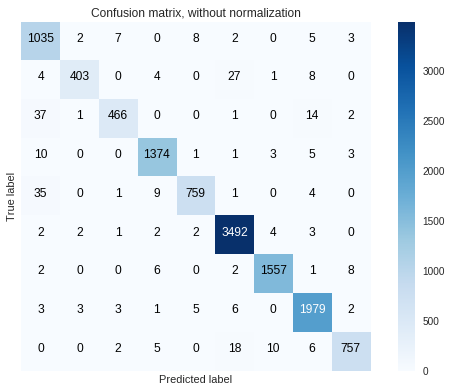

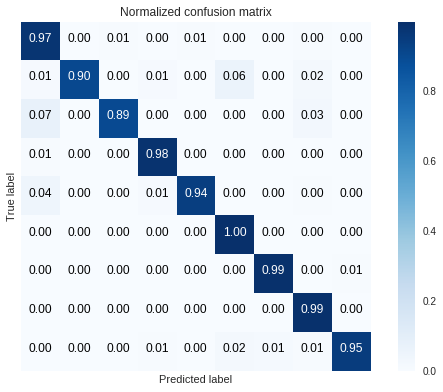

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data_rf, train_labels_rf)
results = rf.predict(test_data_rf)
from sklearn.metrics import confusion_matrix
from itertools import product
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(test_labels_rf, results)
class_names=[]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')


from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(test_labels_rf, results))